In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import math

%matplotlib inline
style.use('seaborn')

In [2]:
tf.__version__

'2.2.0'

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

Training Size:  60000
Testing Size:  10000


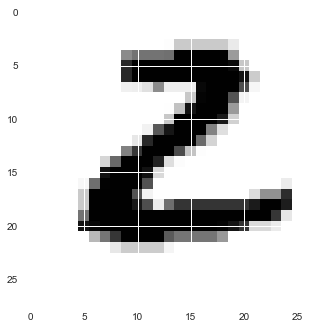

In [4]:
import random
print("Training Size: ", len(x_train))
print("Testing Size: ", len(x_test))
plt.imshow(x_train[random.randint(0,255)].reshape(28,28))

In [5]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28,1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, NumpyArrayIterator

train_datagen = ImageDataGenerator()
test_datagen  = ImageDataGenerator()

train_generator = NumpyArrayIterator(x_train, y_train, train_datagen, batch_size=500)

validation_generator =  NumpyArrayIterator(x_test,y_test, test_datagen, batch_size=500)

model.compile(
    loss='sparse_categorical_crossentropy',
    #optimizer=tf.keras.optimizers.Adam(0.001),
    optimizer='rmsprop',
    metrics=['accuracy'],
)

model.fit(train_generator, steps_per_epoch=len(x_train)/500,verbose=1, epochs=5)

'''
model.fit(
    x_train, y_train,
    epochs=6
)
'''

Epoch 1/5
120/120 [==============================] - 13s 110ms/step - loss: 0.1902 - accuracy: 0.9439
Epoch 2/5
120/120 [==============================] - 13s 112ms/step - loss: 0.1136 - accuracy: 0.9671
Epoch 3/5
120/120 [==============================] - 13s 112ms/step - loss: 0.0807 - accuracy: 0.9760
Epoch 4/5
120/120 [==============================] - 14s 113ms/step - loss: 0.0621 - accuracy: 0.9816
Epoch 5/5
120/120 [==============================] - 14s 114ms/step - loss: 0.0496 - accuracy: 0.9854


'\nmodel.fit(\n    x_train, y_train,\n    epochs=6\n)\n'

In [17]:
val_loss, val_acc = model.evaluate(validation_generator)
print(val_loss, val_acc)

20/20 [==============================] - 1s 32ms/step - loss: 0.0626 - accuracy: 0.9795
0.0625784695148468 0.9794999957084656


In [18]:
predictions = model.predict(validation_generator)

Index:  4883
Prediction:  6
Actual:  6


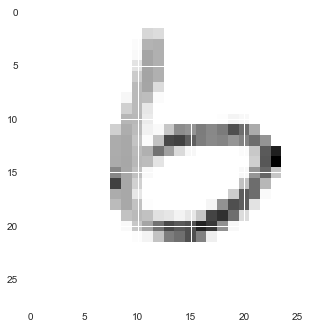

In [69]:
idx = random.randint(0,9500)
print("Index: ",idx)
print("Prediction: ", np.argmax(predictions[idx]))
print("Actual: ", y_test[idx])
plt.imshow(x_test[idx].reshape(28,28))

In [70]:
model.save('ocr.model')

INFO:tensorflow:Assets written to: ocr.model\assets


In [71]:
ocr_model = tf.keras.models.load_model('ocr.model')

In [72]:
IMG_SIZE = 28
from skimage.transform import rescale, resize, downscale_local_mean

3

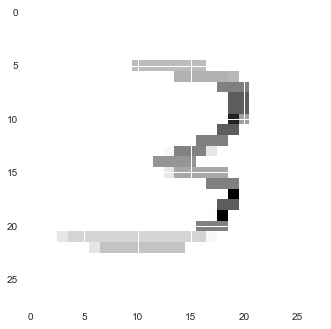

In [74]:
data = np.loadtxt('image.txt')
data = data.reshape(400,400)
image_resized = resize(data, (IMG_SIZE, IMG_SIZE), anti_aliasing=False)
image_resized = tf.keras.utils.normalize(image_resized, axis=1)
plt.imshow(image_resized)
image_resized = image_resized.reshape(1,IMG_SIZE,IMG_SIZE,1)
val = ocr_model.predict(image_resized)
np.argmax(val[0])